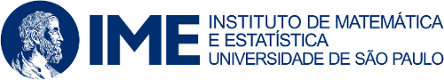

# **Institute of Mathematics and Statistics - University of Sao Paulo**

## MAP2321 - Techniques in Control Theory
---
##*Inverted Pendulum or the Cart-Pole System - State Feedback and State Observer*
---
### Student: Milton Leal Neto - NUSP: 8973974
### Professor: Clodoaldo Grotta Ragazzo



# State Feedback (Exercise)

## a) Find the gain matrix $K$ where $u = -Kx$

In [1]:
import sympy as sp
from sympy import I, symbols, Matrix, Eq
from IPython.display import display, Math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.linalg as la

# Initialize pretty printing for symbolic math
sp.init_printing(use_unicode=True, use_latex='mathjax')

# Define the system's parameters and variables
m, M, g, l = 0.1, 2, 9.9, 0.5  # m: mass, M: Mass, g: gravity, l: length

# Construct matrices A and B representing the system's dynamics
A = sp.Matrix([
    [0, 1, 0, 0],
    [((m + M)/M)*(g/l), 0, 0, 0],
    [0, 0, 0, 1],
    [(-m*g)/M, 0, 0, 0]
])
B = sp.Matrix([0, (-1)/(M*l), 0, 1/M])

# Check system controllability by forming the controllability matrix
controllability_matrix = B
for i in range(1, A.shape[0]):
    controllability_matrix = controllability_matrix.row_join(A**i * B)

# Display the controllability matrix in a larger format using '\Huge'
display(Math(r'\text{{Controllability Matrix }}:'))
print('\n')
display(Math(r'\mathcal{C}_r = \LARGE ' + sp.latex(controllability_matrix)))
print('\n')

# Display the rank of the controllability matrix in a larger format
rank = controllability_matrix.rank()
display(Math(r'\text{{Rank of }} \mathcal{{C_r}} : '  + sp.latex(rank)))
print('\n')

# Display if the system is controllable in a larger format
system_controllable = 'controllable' if rank == A.shape[0] else 'not controllable'
display(Math(r'\text{{The system is }}'  + system_controllable))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Find $P$ and $P^ {-1}$

$
\mathcal{P} = \left[\begin{array}{c:c:c:c}
A^3B & A^2B & AB & B
\end{array}\right]
$

In [2]:
# Compute powers of A multiplied by B for the transformation matrix P
A3B, A2B, AB = A**3 * B, A**2 * B, A * B
P = A3B.row_join(A2B).row_join(AB).row_join(B)

# Display the transformation matrix P
display(Math(r'\mathcal{P} = \LARGE ' + sp.latex(P)))
print("\n")

# Check if P is invertible and compute its inverse
if P.det() != 0:
    P_inverse = P.inv().applyfunc(lambda x: x.evalf(4))
    display(Math(r'\mathcal{P}^{-1} = \LARGE ' + sp.latex(P_inverse)))
else:
    print("Matrix P is not invertible.")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Define function for numerical rounding

In [3]:
# Define rounding function for numerical stability
def round_or_zero(x, threshold=1e-2, digits=4):
    return 0 if abs(x) < threshold else x.evalf(digits)

### Calculate matrices $A_1$ and $B_1$

In [4]:
# Transform matrices A and B using P inverse
A_1 = P_inverse * A * P
B_1 = P_inverse * B

# Round elements of the transformed matrices
A_1 = A_1.applyfunc(lambda x: round_or_zero(x))
B_1 = B_1.applyfunc(lambda x: round_or_zero(x))

# Display the transformed matrices
display(Math(r'\mathcal{A}_1 = \LARGE ' + sp.latex(A_1)))
print("\n")
display(Math(r'\mathcal{B}_1 = \LARGE ' + sp.latex(B_1)))
print("\n")

# Extract and display coefficients from the first column of A_transformed
coefs = A_1.col(0)
coef_display = '\\\\ '.join([f'a_{{1{i+1}}} = {sp.latex(coef)}' for i, coef in enumerate(coefs)])
display(Math(r'\text{{Coefficients of the first column of }} \mathcal{A}_1: \\ ' + coef_display))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Calculate matrices $Q$ and $Q^{-1}$

In [5]:
# Define matrix Q for a secondary transformation
Q = sp.Matrix([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [(-g*(M+m))/(M*l), 0, 1, 0],
    [0, (-g*(M+m))/(M*l), 0, 1]
])
Q_inv = Q.inv().applyfunc(lambda x: round_or_zero(x))

# Display matrix Q and its inverse
display(Math(r'\mathcal{Q} = \LARGE ' + sp.latex(Q)))
print("\n")
display(Math(r'\mathcal{Q}^{-1} = \LARGE ' + sp.latex(Q_inv)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Calculate matrices $A_2$ and $B_2$

In [6]:
# Further transform A and B using matrix Q
A_2 = Q_inv * A_1 * Q
B_2 = Q_inv * B_1

A_2 = A_2.applyfunc(lambda x: round_or_zero(x))
B_2 = B_2.applyfunc(lambda x: round_or_zero(x))

# Display the final transformed matrices
display(Math(r'\mathcal{A}_2 = \LARGE ' + sp.latex(A_2)))
print("\n")
display(Math(r'\mathcal{B}_2 = \LARGE ' + sp.latex(B_2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Poles placement

In [7]:
# Define desired poles for controller design
lambda_1, lambda_2, lambda_3, lambda_4 = -1 + I * sp.sqrt(3), -1 - I * sp.sqrt(3), -5, -5
lamb = symbols('lambda')

# Form the characteristic polynomial with the desired poles
p_lambda = (lamb - lambda_1) * (lamb - lambda_2) * (lamb - lambda_3) * (lamb - lambda_4)
expanded_p_lambda = sp.expand(p_lambda)
coeffs = expanded_p_lambda.as_poly(lamb).all_coeffs()[1:]
alpha_vector = Matrix(coeffs)

# Display the characteristic polynomial and alpha vector
display(Math(r'p(\lambda) = \LARGE ' + sp.latex(p_lambda)))
print("\n")
display(Math(r'\text{{Expanded Polynomial }}: \LARGE ' + sp.latex(expanded_p_lambda)))
print("\n")
display(Math(r'\alpha = \LARGE ' + sp.latex(alpha_vector)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Calculate the new characteristic polynomial

In [8]:

# Define the control matrix K_z with unknowns
k1, k2, k3, k4 = sp.symbols('k1 k2 k3 k4')
K_z = sp.Matrix([[k1, k2, k3, k4]])

# Define the state vector z
z = sp.symbols('z1:5')

# Compute the closed-loop system matrix A_cl
A_cl = Q_inv * A_1 * Q - Q_inv * B_1 * K_z

# Define lambda for the characteristic polynomial
lamb = sp.symbols('lambda')

# Compute the characteristic polynomial of the closed-loop system matrix
char_poly_cl = A_cl.charpoly(lamb).as_expr()

# Explicitly convert to a polynomial in lamb and extract coefficients
char_poly_lamb = sp.Poly(char_poly_cl, lamb)
coeffs = char_poly_lamb.all_coeffs()

# Round the coefficients to 2 significant digits
rounded_coeffs = [sp.N(c, 2) for c in coeffs]

# Reconstruct the rounded polynomial
char_poly_cl_rounded = sum(c * lamb**i for i, c in enumerate(reversed(rounded_coeffs)))

# Display the rounded characteristic polynomial in descending powers of lambda
display(Math(r'\text{{Characteristic polynomial of the closed-loop system (rounded) }} p(\lambda):'))
print("\n")
display(Math(r'\LARGE p(\lambda) = ' + sp.latex(char_poly_cl_rounded)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# Extract the coefficients of the characteristic polynomial of the closed-loop system matrix
coeffs_cl = sp.Poly(char_poly_cl, lamb).all_coeffs()[1:]

# Set up the equations by equating the coefficients of both polynomials
equations = [Eq(coeffs_cl[i], alpha_vector[i]) for i in range(len(alpha_vector))]

# Display the equations with coefficients rounded to 2 significant digits
display(Math(r'\text{{Equations to solve:}}'))
for eq in equations:
    # Round the coefficients of each term in the equation
    rounded_lhs = sp.sympify(sp.N(eq.lhs, 2))
    rounded_rhs = sp.sympify(sp.N(eq.rhs, 2))
    rounded_eq = Eq(rounded_lhs, rounded_rhs)

    # Display the rounded equation
    display(Math(r'\LARGE ' + sp.latex(rounded_eq)))

print("\n")

# Solve the system of equations for the control matrix K_z
K_z_solution = sp.solve(equations, (k1, k2, k3, k4), dict=True)

# Display the solution for the feedback matrix K_z with rounding
display(Math(r'\text{{Solution for feedback matrix }} K_z:'))
for sol in K_z_solution:
    # Round each element of the solution to 2 significant digits and display them one below each other
    for k, v in sol.items():
        rounded_v = sp.N(v, 2)
        display(Math(r'\LARGE ' + sp.latex(k) + " = " + sp.latex(rounded_v)))

print("\n")
# Substitute the solution values into the K_z matrix
K_z_substituted = K_z.subs(K_z_solution[0])

# Calculate the final K matrix using the provided relationship
K_final = K_z_substituted * Q_inv * P_inverse

# Round the final K matrix to 2 significant digits
K_final = K_final.applyfunc(lambda x: sp.N(x, 3))

# Display the final K matrix
display(Math(r'\text{{Gain matrix }}:'))
display(Math(r'\Large K= ' + sp.latex(K_final)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## b) Plot $x_1(t) = \theta(t)$ with initial conditions given as:
## $x_1(0)=0$, $x_2(0)=1$, $x_3(0)=0$, $x_4(0)=0$

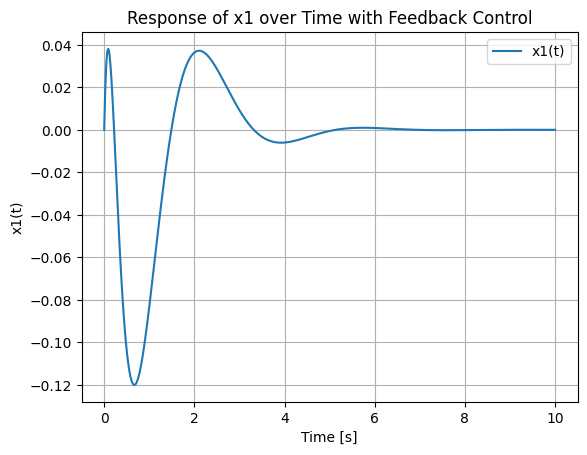

In [10]:
# Convert SymPy matrices to NumPy arrays
A_np = np.array(A).astype(np.float64)
B_np = np.array(B).astype(np.float64)
K_final_np = np.array(K_final).astype(np.float64)

# Define the closed-loop system dynamics
def closed_loop_dynamics(x, t, A_np, B_np, K_final_np):
    u = -np.dot(K_final_np, x)  # State feedback control law
    return np.dot(A_np, x) + np.dot(B_np, u)  # Closed-loop dynamics

# Time vector for simulation
t = np.linspace(0, 10, 1000)

# Initial state
x0 = np.array([0, 1, 0, 0])

# Solve the closed-loop system dynamics using odeint
x_t = odeint(closed_loop_dynamics, x0, t, args=(A_np, B_np, K_final_np))

# Extract x1(t)
x1_t = x_t[:, 0]

# Plot x1(t)
plt.plot(t, x1_t, label='x1(t)')
plt.xlabel('Time [s]')
plt.ylabel('x1(t)')
plt.title('Response of x1 over Time with Feedback Control')
plt.legend()
plt.grid()
plt.show()

# State Observer (Exercise)

## a) Find the Observer gain matrix L for the following poles:
## $\lambda_{O_1} = -2 + i2\sqrt(3)$,
## $\lambda_{O_2} = -2 - i2\sqrt(3)$,
## $\lambda_{O_3} = -10$
## $\lambda_{O_4} = -10$

In [11]:
# Output matrix C
C = sp.Matrix([[0, 0, 1, 0]])

# Transpose matrices to match the Mathematica code
AT = A.transpose()
CT = C.transpose()

AT = AT.applyfunc(lambda x: round_or_zero(x))
CT = CT.applyfunc(lambda x: round_or_zero(x))

# Display the final transformed matrices
display(Math(r'\mathcal{A}^T = \LARGE ' + sp.latex(AT)))

print('\n')

# Display the final transformed matrices
display(Math(r'\mathcal{C}^T = \LARGE ' + sp.latex(CT)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Find $P_{obs}$ and $P^{-1}_{obs}$

$
\mathcal{P_{obs}} = \left[\begin{array}{c:c:c:c}
(A^3)^TC^T & (A^2)^TC^T &  A^TC^T & A^T
\end{array}\right]
$

In [12]:
# Compute powers of A multiplied by B for the transformation matrix P
AT3CT, AT2CT, ATC = AT**3 * CT, AT**2 * CT, AT * CT
P_obs = AT3CT.row_join(AT2CT).row_join(ATC).row_join(CT)

# Display the transformation matrix P
display(Math(r'\mathcal{P_{obs}} = \LARGE ' + sp.latex(P_obs)))
print("\n")

# Check if P is invertible and compute its inverse
if P_obs.det() != 0:
    P_obs_inverse = P_obs.inv().applyfunc(lambda x: x.evalf(4))
    display(Math(r'\mathcal{P}^{-1}_{obs} = \LARGE ' + sp.latex(P_obs_inverse)))
else:
    print("Matrix P is not invertible.")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Calculate matrices $A_{1_{obs}}$ and $B_{1_{obs}}$

In [13]:
# Transform matrices A and B using P inverse
A_1_obs = P_obs_inverse * AT * P_obs
B_1_obs = P_obs_inverse * CT

# Round elements of the transformed matrices
A_1_obs = A_1_obs.applyfunc(lambda x: round_or_zero(x))
B_1_obs = B_1_obs.applyfunc(lambda x: round_or_zero(x))

# Display the transformed matrices
display(Math(r'\mathcal{A}_{1_{obs}} = \LARGE ' + sp.latex(A_1_obs)))
print("\n")
display(Math(r'\mathcal{B}_{1_{obs}} = \LARGE ' + sp.latex(B_1_obs)))
print("\n")





<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
# Extract and display coefficients from the first column of A_transformed
coefs = A_1_obs.col(0)
coef_display = '\\\\ '.join([f'a_{{1{i+1}}} = {sp.latex(coef)}' for i, coef in enumerate(coefs)])
display(Math(r'\text{{Coefficients of the first column of }} \mathcal{A}_{1_{obs}}: \\ ' + coef_display))

<IPython.core.display.Math object>

### Calculate matrices $Q_{obs}$ and $Q^{-1}_{obs}$

In [15]:
# Define matrix Q for a secondary transformation
Q_obs = sp.Matrix([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [(-g*(M+m))/(M*l), 0, 1, 0],
    [0, (-g*(M+m))/(M*l), 0, 1]
])
Q_inv_obs = Q_obs.inv().applyfunc(lambda x: round_or_zero(x))

# Display matrix Q and its inverse
display(Math(r'\mathcal{Q_{obs}} = \LARGE ' + sp.latex(Q_obs)))
print("\n")
display(Math(r'\mathcal{Q}^{-1}_{obs} = \LARGE ' + sp.latex(Q_inv_obs)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Calculate matrices $A_{2_{obs}}$ and $B_{2_{obs}}$

In [16]:
# Further transform A and B using matrix Q
A_2_obs = Q_inv_obs * A_1_obs * Q_obs
B_2_obs = Q_inv_obs * B_1_obs

A_2_obs = A_2_obs.applyfunc(lambda x: round_or_zero(x))
B_2_obs = B_2_obs.applyfunc(lambda x: round_or_zero(x))

# Display the final transformed matrices
display(Math(r'\mathcal{A}_{2_{obs}} = \LARGE ' + sp.latex(A_2_obs)))
print("\n")
display(Math(r'\mathcal{B}_{2_{obs}} = \LARGE ' + sp.latex(B_2_obs)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Poles placement

In [17]:
# Define desired poles for controller design
lambda_1_obs, lambda_2_obs, lambda_3_obs, lambda_4_obs = -1*2 + I *2* sp.sqrt(3), -1*2 - I *2* sp.sqrt(3), -5*2, -5*2
lamb = symbols('lambda')

# Form the characteristic polynomial with the desired poles
p_lambda = (lamb - lambda_1_obs) * (lamb - lambda_2_obs) * (lamb - lambda_3_obs) * (lamb - lambda_4_obs)
expanded_p_lambda = sp.expand(p_lambda)
coeffs = expanded_p_lambda.as_poly(lamb).all_coeffs()[1:]
alpha_vector = Matrix(coeffs)

# Display the characteristic polynomial and alpha vector
display(Math(r'p(\lambda) = \LARGE ' + sp.latex(p_lambda)))
print("\n")
display(Math(r'\text{{Expanded Polynomial }}: \LARGE ' + sp.latex(expanded_p_lambda)))
print("\n")
display(Math(r'\alpha = \LARGE ' + sp.latex(alpha_vector)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Calculate the new characteristic polynomial

In [18]:

# Define the control matrix K_z with unknowns
l1_obs, l2_obs, l3_obs, l4_obs = sp.symbols('l1_obs l2_obs l3_obs l4_obs')
L_z_obs = sp.Matrix([[l1_obs, l2_obs, l3_obs, l4_obs]])

# Define the state vector w
w = sp.symbols('w1:5')

# Compute the closed-loop system matrix A_cl
A_cl = Q_inv_obs * A_1_obs * Q_obs - Q_inv_obs * B_1_obs * L_z_obs

# Define lambda for the characteristic polynomial
lamb = sp.symbols('lambda')

# Compute the characteristic polynomial of the closed-loop system matrix
char_poly_cl = A_cl.charpoly(lamb).as_expr()

# Explicitly convert to a polynomial in lamb and extract coefficients
char_poly_lamb = sp.Poly(char_poly_cl, lamb)
coeffs = char_poly_lamb.all_coeffs()

# Round the coefficients to 2 significant digits
rounded_coeffs = [sp.N(c, 2) for c in coeffs]

# Reconstruct the rounded polynomial
char_poly_cl_rounded = sum(c * lamb**i for i, c in enumerate(reversed(rounded_coeffs)))

# Display the rounded characteristic polynomial in descending powers of lambda
display(Math(r'\text{{Characteristic polynomial of the closed-loop system (rounded) }} p(\lambda):'))
print("\n")
display(Math(r'\LARGE p(\lambda) = ' + sp.latex(char_poly_cl_rounded)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
# Extract the coefficients of the characteristic polynomial of the closed-loop system matrix
coeffs_cl = sp.Poly(char_poly_cl, lamb).all_coeffs()[1:]

# Set up the equations by equating the coefficients of both polynomials
equations = [Eq(coeffs_cl[i], alpha_vector[i]) for i in range(len(alpha_vector))]

# Display the equations with coefficients rounded to 2 significant digits
display(Math(r'\text{{Equations to solve:}}'))
for eq in equations:
    # Round the coefficients of each term in the equation
    rounded_lhs = sp.sympify(sp.N(eq.lhs, 2))
    rounded_rhs = sp.sympify(sp.N(eq.rhs, 2))
    rounded_eq = Eq(rounded_lhs, rounded_rhs)

    # Display the rounded equation
    display(Math(r'\LARGE ' + sp.latex(rounded_eq)))

print("\n")

# Solve the system of equations for the control matrix K_z
K_z_obs_solution = sp.solve(equations, (l1_obs, l2_obs, l3_obs, l4_obs), dict=True)

# Display the solution for the feedback matrix K_z with rounding
display(Math(r'\text{{Solution for feedback matrix }} K_{z_{obs}}:'))
for sol in K_z_obs_solution:
    # Round each element of the solution to 2 significant digits and display them one below each other
    for k, v in sol.items():
        rounded_v = sp.N(v, 2)
        display(Math(r'\LARGE ' + sp.latex(k) + " = " + sp.latex(rounded_v)))

print("\n")
# Substitute the solution values into the K_z matrix
L_z_obs_substituted = L_z_obs.subs(K_z_obs_solution[0])

# Calculate the final K matrix using the provided relationship
L_obs_final = L_z_obs_substituted * Q_inv_obs * P_obs_inverse

# Transpose the observer gain matrix
L_obs_final_T = L_obs_final.transpose()

# Round the transposed matrix to 2 significant digits
L_obs_final_T = L_obs_final_T.applyfunc(lambda x: sp.N(x, 3))

# Display the transposed and rounded observer gain matrix
display(Math(r'\text{{Transposed Observer Gain matrix }}:'))
display(Math(r'\Large L^T= ' + sp.latex(L_obs_final_T)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## b) Plot all solutions together such that:
## $x_1(t) = \theta(t)$ with initial conditions given as:
## $x_1(0)=0$, $x_2(0)=1$, $x_3(0)=0$, $x_4(0)=0$

## $x_{1_{obs}}(t) = \theta(t)$ with initial conditions given as:
## $x_1(0)=0$, $x_2(0)=1$, $x_3(0)=0$, $x_4(0)=0$

## $\hat x_1(t) = \theta(t)$ with initial conditions given as:
## $x_1(0)=0$, $x_2(0)=1$, $x_3(0)=0$, $x_4(0)=0$



We will consider this final systema F given by:

$BK = B \cdot K$

$LC = L \cdot C$

$F = \left[\begin{array}{c:c}
A & -BK \\
\hdashline
LC & A - BK - LC
\end{array}\right]$


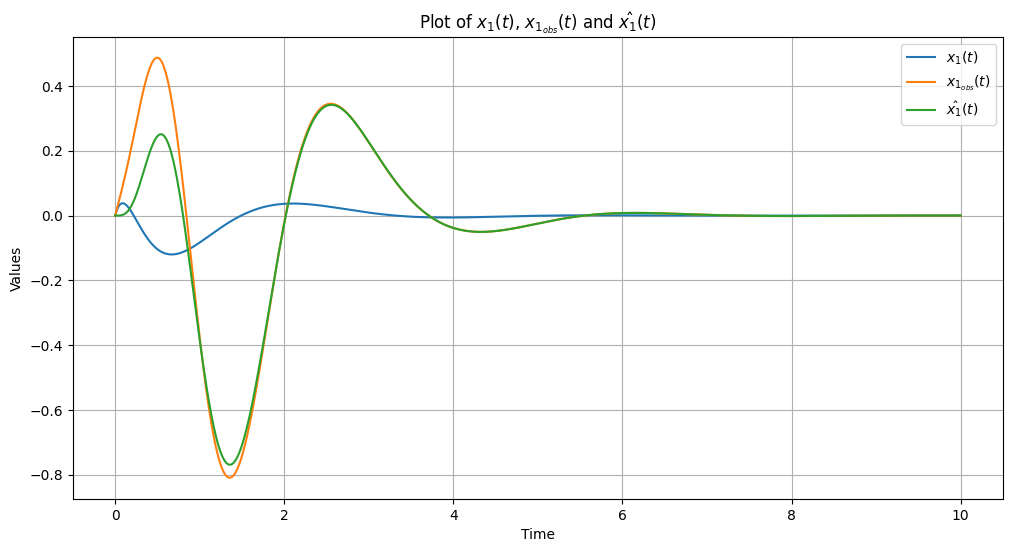

In [23]:
# Define the matrices A, Bmatrix.Kg, L.Cmatrix
A = np.array(A).astype(np.float64)
L = np.array(L_obs_final_T).astype(np.float64)
C = np.array(C).astype(np.float64)

BK = np.dot(B_np, K_final_np)
LC = np.dot(L, C)

# Construct the final system matrix F
F = np.block([[A, -BK], [LC, A - BK - LC]])

# Define the differential equation
def model(z, t):
    return F.dot(z)

# Initial conditions
z0 = [0, 1, 0, 0, 0, 0, 0, 0]

# Time points
t = np.linspace(0, 10, 1000)

# Solve ODE
solution = odeint(model, z0, t)

# Extract x1 and xobs1 from the solution
x1_ob = solution[:, 0]
xobs1 = solution[:, 4]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, x1_t, label='$x_1(t)}$')
plt.plot(t, x1_ob, label='$x_{1_{obs}}(t)$')
plt.plot(t, xobs1, label='$\hat{x_1}(t)$')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Plot of $x_1(t)$, $x_{1_{obs}}(t)$ and $\hat{x_1}(t)$')
plt.legend()
plt.grid(True)
plt.show()
